<a href="https://colab.research.google.com/github/MirzaUmar1/SIC-Artificial-Intelligence/blob/main/Classwork/SICClassTask13ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 13: Building and Training Neural Networks for MNIST Classification**

##In this assignment, you will implement two different neural network models to classify handwritten digits from the MNIST dataset using TensorFlow and Keras. The first model will be a simple neural network, and the second will be a deep neural network. Both models will be evaluated using training and validation accuracy and loss curves.

##**Part 1: Simple Neural Network for MNIST Classification**

###1. Load and Preprocess the Data:
 - Use TensorFlow’s tf.keras.datasets.mnist to load the MNIST dataset.
 - Normalize the pixel values of the images to be between 0 and 1 by dividing by 255.0.
 - Split the training data into training and validation sets (e.g., 80 percent training, 20 percent validation).

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###2. Define the Model:
 - Use the Keras Sequential API to create a simple neural network model with:
- An input layer that flattens the 28x28 input images to a 784-dimensional vector.
- Two dense layers with 16 and 8 neurons, respectively, using ReLU activation.
- An output layer with 10 neurons (one for each digit class) using softmax activation to output class
probabilities.

In [3]:
# Define the simple neural network model
simple_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(16, activation='relu'),  # First hidden layer
    Dense(8, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax')  # Output layer
])


###3. Compile the Model:
- Set up the model using the Adam optimizer with a learning rate of 0.001.
- Use categorical cross-entropy as the loss function and track accuracy as the evaluation metric.


In [4]:
# Compile the simple model
simple_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


###4. Train the Model:
- Train the model using the fit() function for 10 epochs with a batch size of 32.
- Provide the validation set as part of the training to monitor validation accuracy and loss during training.

In [5]:
# Train the model
simple_history = simple_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6942 - loss: 0.9775 - val_accuracy: 0.9126 - val_loss: 0.3056
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9149 - loss: 0.2941 - val_accuracy: 0.9333 - val_loss: 0.2394
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9338 - loss: 0.2312 - val_accuracy: 0.9367 - val_loss: 0.2170
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9410 - loss: 0.2110 - val_accuracy: 0.9407 - val_loss: 0.2033
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9443 - loss: 0.1903 - val_accuracy: 0.9415 - val_loss: 0.2008
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9495 - loss: 0.1776 - val_accuracy: 0.9460 - val_loss: 0.1854
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9535 - loss: 0.1624 - val_accuracy: 0.9486 - val_loss: 0.1792
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9555 - loss: 0.1530 - 

###5. Plot Training and Validation Curves:
- After training, plot the training and validation accuracy and training and validation loss over the
epochs.

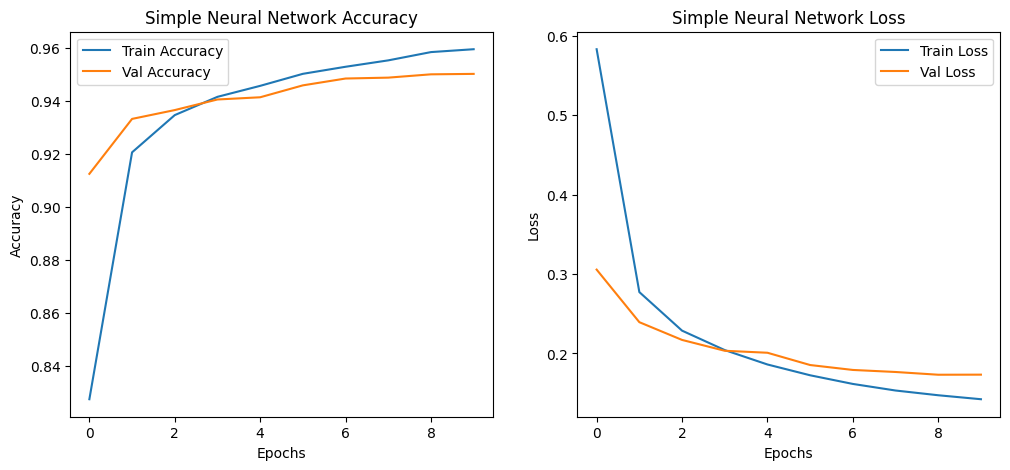

In [6]:
# Plot training and validation accuracy/loss
def plot_training_curves(history, title):
    plt.figure(figsize=(12, 5))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the simple model's training curves
plot_training_curves(simple_history, "Simple Neural Network")


###Evaluate the Simple Model on Test Data

In [13]:
# Evaluate the simple model on the test dataset
test_loss, test_acc = simple_model.evaluate(x_test, y_test, verbose=0)
print(f"Simple Neural Network Test Accuracy: {test_acc:.4f}")

Simple Neural Network Test Accuracy: 0.9487


##**Part 2: Deep Neural Network for MNIST Classification**

###1. Load and Preprocess the Data:
- Repeat the data loading and preprocessing steps as in Part 1. You may reuse the code here.

In [7]:
# Data loading and preprocessing (reuse from Part 1)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


###2. Define the Deep Neural Network Model:
 - Create a deeper neural network model with the following architecture:
- Flatten the 28x28 input images to a 784-dimensional vector.
- Add four dense layers with 512, 256, 128, and 64 neurons, respectively, all using ReLU activation.
- After each of the first three dense layers, include a Dropout layer with a rate of 0.2 to prevent
overfitting.
- Add an output layer with 10 neurons and softmax activation to output the probabilities for each
digit class.

In [8]:
from tensorflow.keras.layers import Dropout

# Define the deep neural network model
deep_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(512, activation='relu'),  # First hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(128, activation='relu'),  # Third hidden layer
    Dropout(0.2),
    Dense(64, activation='relu'),   # Fourth hidden layer
    Dense(10, activation='softmax')  # Output layer
])


###3. Compile the Deep Model:
- Compile the model with the Adam optimizer (learning rate 0.001) and categorical cross-entropy as
the loss function.
- Track accuracy as the evaluation metric.

In [9]:
# Compile the deep model
deep_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


###4. Train the Deep Model:
- Train the model for 30 epochs with a batch size of 64.
- Again, use the validation data to monitor validation accuracy and loss during training.

In [10]:
# Train the deep model
deep_history = deep_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64
)


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8180 - loss: 0.5685 - val_accuracy: 0.9622 - val_loss: 0.1248
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9591 - loss: 0.1433 - val_accuracy: 0.9687 - val_loss: 0.1094
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9689 - loss: 0.1035 - val_accuracy: 0.9732 - val_loss: 0.0924
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9772 - loss: 0.0758 - val_accuracy: 0.9760 - val_loss: 0.0919
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9800 - loss: 0.0674 - val_accuracy: 0.9740 - val_loss: 0.0985
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9824 - loss: 0.0611 - val_accuracy: 0.9785 - val_loss: 0.0821
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9848 - loss: 0.0510 - val_accuracy: 0.9787 - val_loss: 0.0822
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9861 - loss: 0.0448 - v

###5. Plot Training and Validation Curves for the Deep Model:
- Plot the training and validation accuracy and training and validation loss for the deep neural network
over the epochs.

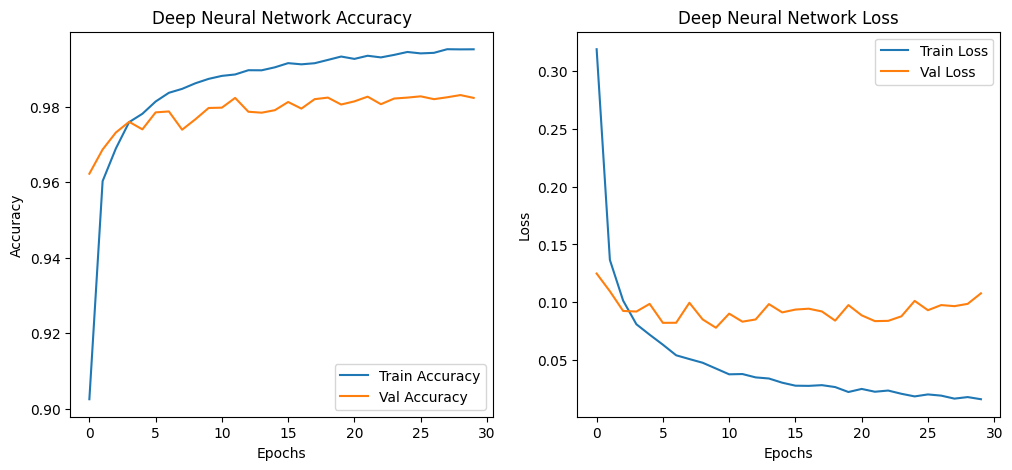

In [11]:
# Plot the deep model's training curves
plot_training_curves(deep_history, "Deep Neural Network")


###Evaluate the Deep Model on Test Data

In [12]:
# Evaluate the deep model on the test dataset
test_loss, test_acc = deep_model.evaluate(x_test, y_test, verbose=0)
print(f"Deep Neural Network Test Accuracy: {test_acc:.4f}")


Deep Neural Network Test Accuracy: 0.9797
